# Regressão Logística

## Previsão e Detecção de Risco de Crédito

![title](images/riscos-de-credito.jpeg)

Variável target ou classe:<br />
credit.rating # classificação_crédito <br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [8]:
atributos_pt = [ 'classificação_crédito',  'conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito',
                 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 
                 'ativos.atual', 'idade', 'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação',
                'dependentes', 'telefone', 'trabalhador_estrangeiro'
]
print(atributos_pt)

['classificação_crédito', 'conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']


In [9]:
pd.set_option('display.max_columns', None)

In [10]:
url = 'https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/refs/heads/master/RegressaoLogistica/credit_dataset_final.csv'
df = pd.read_csv(url)
df.columns = atributos_pt
print(df.shape)
df.head()

(1000, 21)


,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,apartamento.tipo,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [11]:
df['crédito.propósito'].value_counts()

crédito.propósito
3    364
4    352
2    181
1    103
Name: count, dtype: int64

In [12]:
df['ocupação'].unique()

array([3, 2, 1, 4])

In [13]:
df['classificação_crédito'].value_counts()

classificação_crédito
1    700
0    300
Name: count, dtype: int64

Variável target ou classe:<br />
credit.rating - classificação de crédito<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [14]:
df.columns[1:]

Index(['conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento',
       'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade',
       'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação',
       'dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [15]:
len(df.columns[1:])

20

In [16]:
len(df)

1000

## Análise Exploratória

In [17]:
print(atributos_pt)

['classificação_crédito', 'conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']


In [18]:
# variavél target ou classe - class
df['classificação_crédito'].value_counts() # classificação de crédito

classificação_crédito
1    700
0    300
Name: count, dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
classificação_crédito,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
conta.saldo,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
crédito.duração.meses,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
pagamento.crédito.anterior.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
crédito.propósito,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
crédito.valor,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
poupança,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
duração.emprego,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
taxa.parcelamento,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
estado_civil,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


<Axes: xlabel='classificação_crédito', ylabel='crédito.valor'>

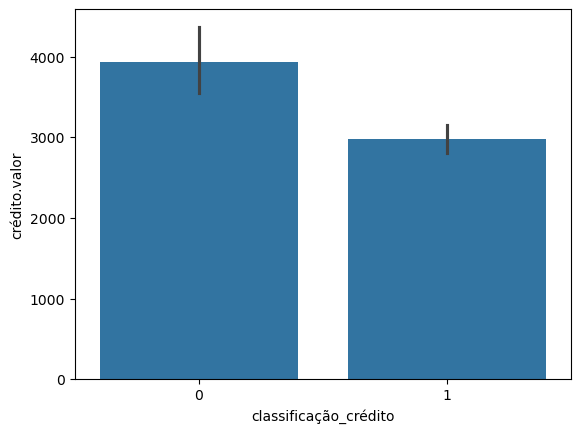

In [20]:
import seaborn as sns
sns.barplot(x='classificação_crédito',y='crédito.valor', data=df)

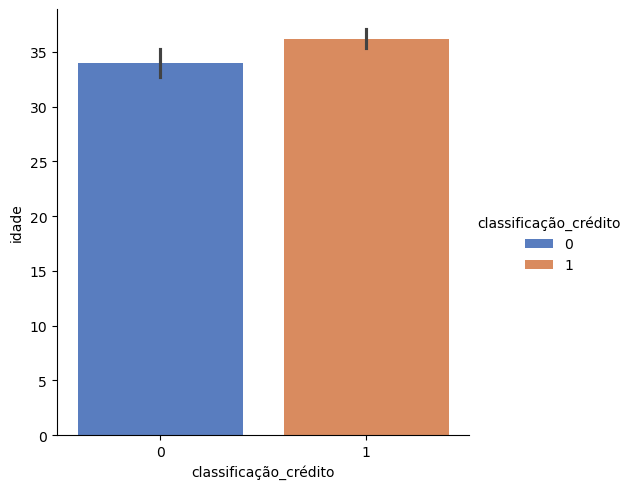

In [21]:
sns.catplot(x='classificação_crédito', y='idade', hue='classificação_crédito', data=df,
                    kind="bar", palette="muted") #size=6,

In [22]:
df.idade.mean()

35.542

<Axes: xlabel='idade', ylabel='Density'>

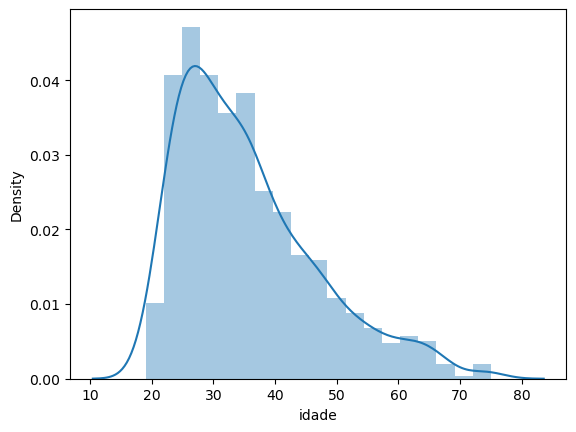

In [23]:
sns.distplot(df.idade)

<Axes: xlabel='crédito.valor', ylabel='Density'>

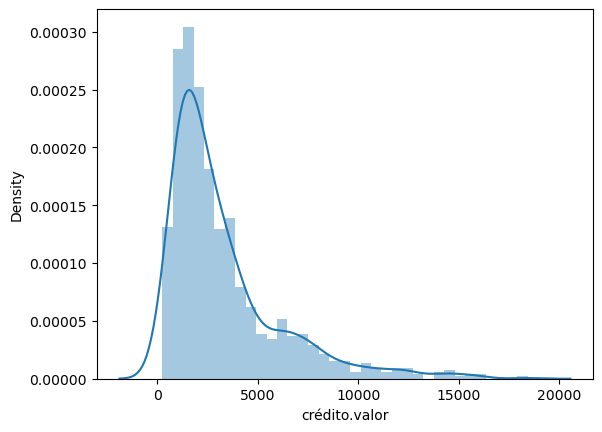

In [24]:
sns.distplot(df['crédito.valor']) # quantidade de crédito

In [25]:
df['crédito.valor'].mean()

3271.248

# Correlação

In [26]:
atributos = list(df.columns)
print(atributos)

['classificação_crédito', 'conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']


In [27]:
atributos_corr = ['classificação_crédito', 'conta.saldo', 'crédito.duração.meses', 'crédito.valor', 'poupança', 
                'duração.emprego',  'estado_civil',  'idade', 'banco.crédito',  'dependentes']
print(atributos_corr)

['classificação_crédito', 'conta.saldo', 'crédito.duração.meses', 'crédito.valor', 'poupança', 'duração.emprego', 'estado_civil', 'idade', 'banco.crédito', 'dependentes']


<Axes: xlabel='classificação_crédito', ylabel='Density'>

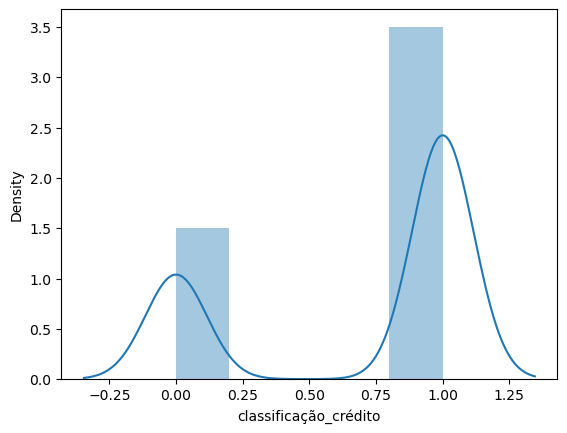

In [28]:
sns.distplot(df['classificação_crédito'])

In [29]:
#df2 = df[df.columns[:14] ]
df2 = df[atributos_corr].copy()
corr = df2.corr()
corr

,classificação_crédito,conta.saldo,crédito.duração.meses,crédito.valor,poupança,duração.emprego,estado_civil,idade,banco.crédito,dependentes
classificação_crédito,1.000000,0.339409,-0.214927,-0.154740,0.179191,0.118092,0.091249,0.091272,0.045727,0.003015
conta.saldo,0.339409,1.000000,-0.071254,-0.041161,0.228340,0.081681,0.034715,0.052530,0.074127,-0.027676
crédito.duração.meses,-0.214927,-0.071254,1.000000,0.624988,0.048550,0.061587,0.045124,-0.037550,0.011292,-0.023834
crédito.valor,-0.154740,-0.041161,0.624988,1.000000,0.060829,0.009649,0.029854,0.032273,0.027446,0.017144
poupança,0.179191,0.228340,0.048550,0.060829,1.000000,0.129549,0.031260,0.080127,-0.025604,0.026641
duração.emprego,0.118092,0.081681,0.061587,0.009649,0.129549,1.000000,0.166372,0.307389,0.139536,0.097196
estado_civil,0.091249,0.034715,0.045124,0.029854,0.031260,0.166372,1.000000,0.073569,0.076789,0.169273
idade,0.091272,0.052530,-0.037550,0.032273,0.080127,0.307389,0.073569,1.000000,0.108992,0.118589
banco.crédito,0.045727,0.074127,0.011292,0.027446,-0.025604,0.139536,0.076789,0.108992,1.000000,0.086652
dependentes,0.003015,-0.027676,-0.023834,0.017144,0.026641,0.097196,0.169273,0.118589,0.086652,1.000000


<Axes: >

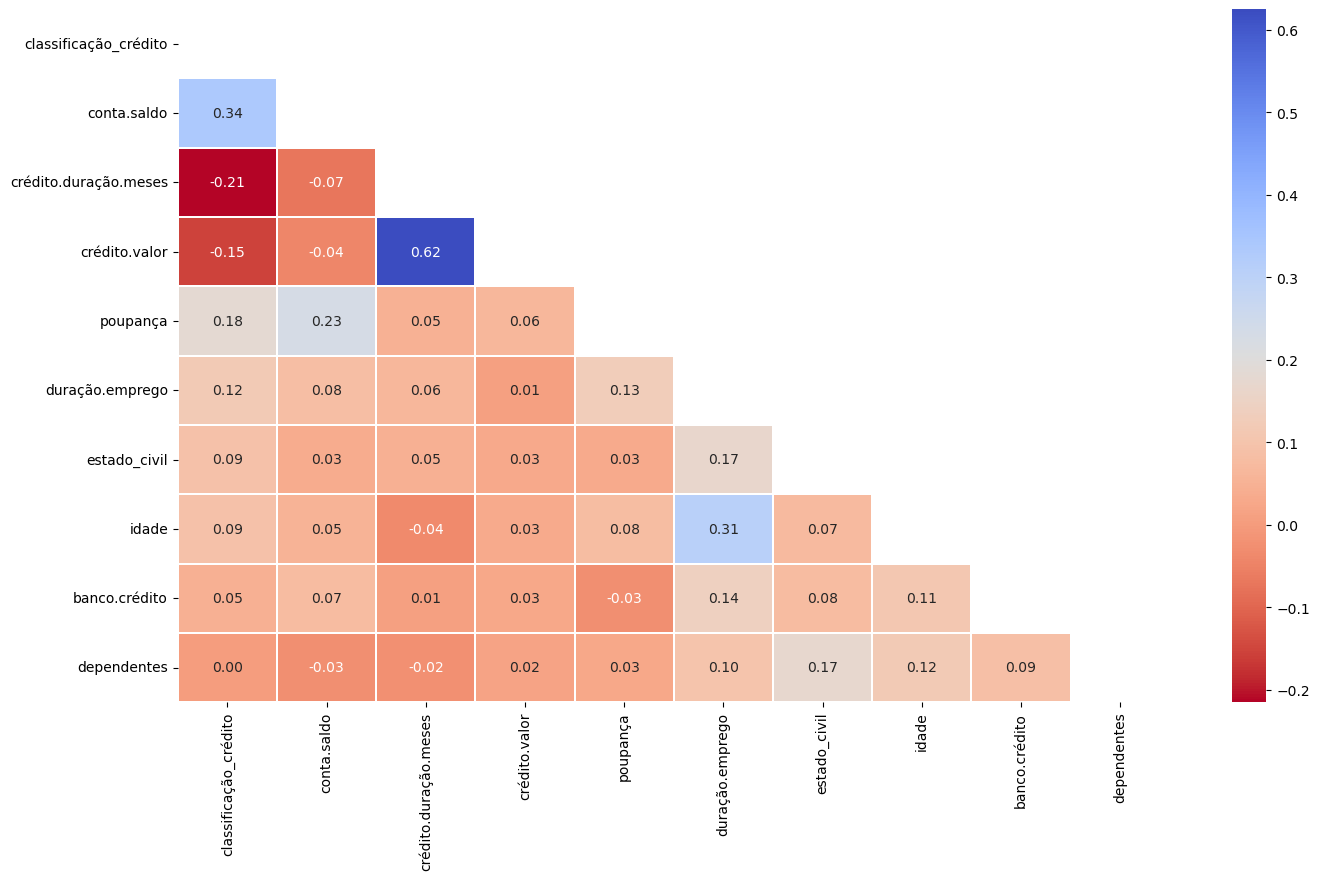

In [30]:
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 9))
sns.heatmap(
    corr,
    cmap='coolwarm_r',
    mask=mask,
    # cmap=cmap,
    # center=0,
    # vmin=-1,
    # vmax=1,
    #square=True,
    linewidths=0.01,
    annot=True,
    fmt = '.2f', 
    xticklabels=df2.columns[:],
    yticklabels=df2.columns[:],
)

# Atributos mais importantes

In [31]:
df.columns[1:]

Index(['conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento',
       'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade',
       'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação',
       'dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [32]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

np.set_printoptions(suppress=True)

X = df[ list(df.columns[1:]) ]
selector = VarianceThreshold()
selector.fit_transform(X)
selector.variances_

array([    0.697511,    68.      ,     0.384736,     0.943775,
       18174.      ,     1.430124,     1.221084,     1.250271,
           1.137616,     0.084351,     1.216975,     1.101836,
          56.      ,     0.151404,     0.280816,     0.232311,
           0.426784,     0.130975,     0.240784,     0.035631])

In [33]:
dfatributos = pd.DataFrame( {'Atributo': df.columns[1:],
                              'Importancia': selector.variances_  })
                             
dfatributos = dfatributos.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
dfatributos

,Atributo,Importancia
0,crédito.valor,18174.000000
1,crédito.duração.meses,68.000000
2,idade,56.000000
3,poupança,1.430124
4,taxa.parcelamento,1.250271
5,duração.emprego,1.221084
6,residência.duração,1.216975
7,estado_civil,1.137616
8,ativos.atual,1.101836
9,crédito.propósito,0.943775


## Definindo X e Y

In [34]:
df.head()

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,apartamento.tipo,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [35]:
atributos = list(df.columns[1:])
print(atributos)

['conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']


In [36]:
X = df[ atributos ]
X.head()

,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,apartamento.tipo,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [37]:
X = X.values.astype(float)
y = df['classificação_crédito'].values

In [38]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [39]:
X[:3]

array([[   1.,   18.,    3.,    2., 1049.,    1.,    1.,    4.,    1.,
           1.,    4.,    2.,   21.,    2.,    1.,    1.,    3.,    1.,
           1.,    1.],
       [   1.,    9.,    3.,    4., 2799.,    1.,    2.,    2.,    3.,
           1.,    2.,    1.,   36.,    2.,    1.,    2.,    3.,    2.,
           1.,    1.],
       [   2.,   12.,    2.,    4.,  841.,    2.,    3.,    2.,    1.,
           1.,    4.,    1.,   23.,    2.,    1.,    1.,    2.,    1.,
           1.,    1.]])

In [40]:
y[:3]

array([1, 1, 1])

## Preparando os dados para aplicar Regressão Logistica<br />

In [41]:
X.shape

(1000, 20)

## Aplicando o Algoritmo

In [42]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y) # Treinamento
model

LogisticRegression()

## Avaliando A Acurácia do Modelo

In [43]:
# check the accuracy on the training set
model.score(X, y) * 100

77.2

### Examinando os Coeficientes

In [44]:
cols = df.columns.values
cols

array(['classificação_crédito', 'conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego',
       'taxa.parcelamento', 'estado_civil', 'fiador',
       'residência.duração', 'ativos.atual', 'idade', 'outros.créditos',
       'apartamento.tipo', 'banco.crédito', 'ocupação', 'dependentes',
       'telefone', 'trabalhador_estrangeiro'], dtype=object)

In [45]:
cols_atributos = cols[1:]
cols_atributos

array(['conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego',
       'taxa.parcelamento', 'estado_civil', 'fiador',
       'residência.duração', 'ativos.atual', 'idade', 'outros.créditos',
       'apartamento.tipo', 'banco.crédito', 'ocupação', 'dependentes',
       'telefone', 'trabalhador_estrangeiro'], dtype=object)

In [46]:
len(cols_atributos)

20

In [47]:
model.intercept_[0]

-0.016080850585266177

In [48]:
model.coef_[0]

array([ 0.7718, -0.0255,  0.437 , -0.4513, -0.0001,  0.2667,  0.1856,
       -0.3025,  0.2035,  0.0293, -0.0716, -0.2537,  0.0095,  0.1499,
        0.0866,  0.0001, -0.0151, -0.064 ,  0.1283,  0.0527])

In [49]:
len(model.coef_[0])

20

In [50]:
# examine the coefficients
elementos = [[x,y] for x, y in zip(cols_atributos, model.coef_[0])]
elementos

[['conta.saldo', 0.7718273774775817],
 ['crédito.duração.meses', -0.025487475149598836],
 ['pagamento.crédito.anterior.status', 0.43704290232877596],
 ['crédito.propósito', -0.45130819251727533],
 ['crédito.valor', -0.00010285010165765837],
 ['poupança', 0.266731665112029],
 ['duração.emprego', 0.1855884851795913],
 ['taxa.parcelamento', -0.302478274717788],
 ['estado_civil', 0.20349463769206882],
 ['fiador', 0.02930595496697525],
 ['residência.duração', -0.07160376712756872],
 ['ativos.atual', -0.25370966668196226],
 ['idade', 0.009452734000829034],
 ['outros.créditos', 0.14986149766503656],
 ['apartamento.tipo', 0.08658690781126614],
 ['banco.crédito', 7.338676723623686e-05],
 ['ocupação', -0.015128792726187328],
 ['dependentes', -0.06401256864674555],
 ['telefone', 0.12826608111784887],
 ['trabalhador_estrangeiro', 0.05274520829041118]]

In [51]:
# examine the coefficients
pd.DataFrame(elementos, columns=['Atributo', 'w'])

,Atributo,w
0,conta.saldo,0.771827
1,crédito.duração.meses,-0.025487
2,pagamento.crédito.anterior.status,0.437043
3,crédito.propósito,-0.451308
4,crédito.valor,-0.000103
5,poupança,0.266732
6,duração.emprego,0.185588
7,taxa.parcelamento,-0.302478
8,estado_civil,0.203495
9,fiador,0.029306


# Previsão

In [52]:
df.head()

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,apartamento.tipo,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [53]:
atributos = list(df.columns[1:])
print(atributos)

['conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']


In [54]:
valores = df.iloc[1, 1:].values
valores

array([   1,    9,    3,    4, 2799,    1,    2,    2,    3,    1,    2,
          1,   36,    2,    1,    2,    3,    2,    1,    1])

In [55]:
model.predict(valores.reshape(1, -1)), model.predict_proba(valores.reshape(1, -1))

(array([1]), array([[0.3198, 0.6802]]))

# Testando p(x)

In [56]:
%%latex
$ p(x) = \Large  \frac{1}{1+e^ - (\beta0 + \beta1 . x) }  $

<IPython.core.display.Latex object>

hx = (bo + b1.x1 + .... bn.xn)

In [57]:
list(valores)

[1, 9, 3, 4, 2799, 1, 2, 2, 3, 1, 2, 1, 36, 2, 1, 2, 3, 2, 1, 1]

In [58]:
model.coef_[0]

array([ 0.7718, -0.0255,  0.437 , -0.4513, -0.0001,  0.2667,  0.1856,
       -0.3025,  0.2035,  0.0293, -0.0716, -0.2537,  0.0095,  0.1499,
        0.0866,  0.0001, -0.0151, -0.064 ,  0.1283,  0.0527])

In [59]:
h_x = 0
for coef, var in zip(model.coef_[0], list(valores)):
    termo = coef * var
    #print(coef, eval(var))
    h_x += termo

h_x += model.intercept_[0]
print(h_x)

0.7545573807069483


In [60]:
import numpy as np

p_x = 1 / (1 + np.e ** - h_x)
print('Probabilidade de Sucesso (classe 1): ', p_x) # Probabilidade de Sucesso
print('Probabilidade  (classe 0): ', 1 - p_x)

Probabilidade de Sucesso (classe 1):  0.6801709176674828
Probabilidade  (classe 0):  0.31982908233251717


## Avaliando o modelo usando split de dados

In [61]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train), len(X_test))

700 300


In [62]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2

LogisticRegression()

In [63]:
# predict class labels for the test set
y_predicted = model2.predict(X_test)
print (y_predicted[:5])

[1 0 1 1 0]


In [64]:
# generate evaluation metrics
print ('Acurácia: ', metrics.accuracy_score(y_test, y_predicted) * 100)

Acurácia:  72.66666666666667


In [65]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs[:5])

[[0.2758 0.7242]
 [0.509  0.491 ]
 [0.1124 0.8876]
 [0.0882 0.9118]
 [0.5028 0.4972]]


In [66]:
probs[: , 0][:4]

array([0.2758, 0.509 , 0.1124, 0.0882])

In [67]:
print('Valores Previstos e suas Probalidades das classes')
df3 = pd.DataFrame( {
                    'Classe': y_predicted,
                   'Prob_classe_0': probs[:, 0],
                   'Prob_classe_1': probs[:, 1] 
                   })
df3.head(10)

Valores Previstos e suas Probalidades das classes


,Classe,Prob_classe_0,Prob_classe_1
0,1,0.275800,0.724200
1,0,0.509049,0.490951
2,1,0.112385,0.887615
3,1,0.088247,0.911753
4,0,0.502761,0.497239
5,0,0.584044,0.415956
6,1,0.065153,0.934847
7,1,0.137340,0.862660
8,1,0.098163,0.901837
9,1,0.091307,0.908693


## Avaliando o modelo usando Cross-validation

In [68]:
from sklearn import model_selection
num_folds = 10
num_instances = len(X)
seed = 7

modelo = LogisticRegression()

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, shuffle=False) #, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, 
                                            scoring='accuracy')

# Print do resultado
print(resultado)
print("Accuracy: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

[0.9  0.91 0.87 0.86 0.86 0.84 0.7  0.6  0.26 0.31]
Accuracy: 0.711 (0.232)


## Realizando Previsões

In [69]:
df.head()

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,apartamento.tipo,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [70]:
df.loc[2,:].values

array([  1,   2,  12,   2,   4, 841,   2,   3,   2,   1,   1,   4,   1,
        23,   2,   1,   1,   2,   1,   1,   1])

In [71]:
df['conta.saldo'].value_counts()

conta.saldo
3    457
1    274
2    269
Name: count, dtype: int64

In [72]:
df.poupança.value_counts()

poupança
1    603
4    183
3    111
2    103
Name: count, dtype: int64

In [73]:
df.columns[1:]

Index(['conta.saldo', 'crédito.duração.meses',
       'pagamento.crédito.anterior.status', 'crédito.propósito',
       'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento',
       'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade',
       'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação',
       'dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [74]:
Xprev1 = np.array(
    [      1,   4,    3,    2, 2049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1] )

Xprev1

array([   1,    4,    3,    2, 2049,    1,    1,    4,    1,    1,    4,
          2,   21,    2,    1,    1,    3,    1,    1,    1])

In [75]:
Xprev1 = Xprev1.reshape(1, -1)
Xprev1

array([[   1,    4,    3,    2, 2049,    1,    1,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1]])

In [76]:
model.predict(Xprev1)[0]

1

In [77]:
model.predict_proba(Xprev1)[0]

array([0.4528, 0.5472])

In [78]:
df.loc[100,:].values

array([   1,    3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])

In [79]:
Xprev2 = np.array([ 3,   18,    1,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])
Xprev2

array([   3,   18,    1,    2, 3777,    3,    2,    4,    3,    1,    4,
          1,   40,    2,    2,    1,    3,    1,    2,    1])

In [80]:
Xprev2 = Xprev2.reshape(1, -1)
Xprev2

array([[   3,   18,    1,    2, 3777,    3,    2,    4,    3,    1,    4,
           1,   40,    2,    2,    1,    3,    1,    2,    1]])

In [81]:
model.predict(Xprev2)[0]

1

In [82]:
model.predict_proba(Xprev2)

array([[0.1092, 0.8908]])

In [83]:
df.loc[5,:].values

array([   1,    1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])

In [84]:
Xprev = np.array([1,   10,    1,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])
Xprev

array([   1,   10,    1,    4, 2241,    1,    1,    1,    3,    1,    3,
          1,   48,    2,    1,    2,    2,    2,    1,    2])

In [85]:
Xprev = Xprev.reshape(1, -1)
Xprev

array([[   1,   10,    1,    4, 2241,    1,    1,    1,    3,    1,    3,
           1,   48,    2,    1,    2,    2,    2,    1,    2]])

In [86]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev)[0]

1

In [87]:
model.predict_proba(Xprev)

array([[0.4653, 0.5347]])

In [88]:
df.loc[950,:].values

array([   0,    2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])

In [89]:
Xprev3 = np.array([2,   14,    3,    3, 12146,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])
Xprev3

array([    2,    14,     3,     3, 12146,     1,     1,     4,     3,
           1,     2,     2,    24,     1,     2,     2,     2,     1,
           1,     1])

In [90]:
Xprev3 = Xprev3.reshape(1, -1)
Xprev3

array([[    2,    14,     3,     3, 12146,     1,     1,     4,     3,
            1,     2,     2,    24,     1,     2,     2,     2,     1,
            1,     1]])

In [91]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev3)

array([0])

In [92]:
model.predict_proba(Xprev3)

array([[0.5629, 0.4371]])

# Métricas para Algorítmos de Classificação

### carregando o dataset

In [93]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [94]:
# df = pd.read_csv('credit_dataset_final.csv')
print(len(df))
df.head()

1000


,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,apartamento.tipo,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [95]:
X = df.iloc[:,1:].values.astype(float)
y = Y =  df.iloc[:,0]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds) #, True, random_state = seed)

# Criando o modelo

solver = 'newton-cg'
solver = 'lbfgs'
modelo = LogisticRegression(max_iter=200, solver=solver)
# max_iter = iterações realizadas para os otimizadores convergirem.
# Solver = Otimizador

{ 'max_iter': [100, 200, 300, 400],
  'solve': ['newton-cg', 'sag']
}

df.head()

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,apartamento.tipo,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


## Acurácia
Número de previsões corretas. <br />
É útil apenas quando existe o mesmo número de observações em cada classe.

In [96]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Acurácia: 0.705 (0.229)


## Confusion Matrix
Permite verificar a acurácia de um modelo com duas ou mais classes

Matriz de Confusão


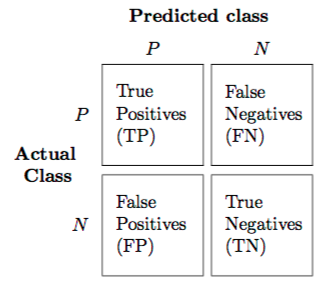

In [97]:
from IPython.display import Image
print("Matriz de Confusão")
Image("confusion_matrix.png")

In [98]:
from sklearn.metrics import confusion_matrix
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

[[ 45  60]
 [ 15 210]]


In [99]:
len(X_treino), len(y_teste)

(670, 330)

In [100]:
y_teste.shape, y_treino.shape

((330,), (670,))

## Curva ROC 

![image](images/auc.png)

### Curva ROC 

A curva ROC (Receiver Operating Characteristic) é como um gráfico que mostra quão bom um modelo é em distinguir as classes.<br>
Isso nos ajuda a ver com que frequência o modelo identifica corretamente as classes positivas e com que frequência evita rotular corretamente as classes negativas como positivas.<br><br>

AUC e ROC funcionam bem para comparar modelos quando o conjunto de dados está aproximadamente equilibrado entre as classes.  <br><br>

A Curva ROC permite analisar a métrica AUC (Area Under the Curve).<br />
Essa é uma métrica de performance para classificação binária, em que podemos definir as classes 
em positivas e negativas. <br />
Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity. <br />
Sensitivity é a taxa de verdadeiros positivos (TP). Esse é o número de instâncias positivas da primeira classe 
que foram previstas corretamente. <br />
Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram 
previstas corretamente.<br />
Valores acima de 0.5 indicam uma boa taxa de previsão.

In [101]:
# Definindo os valores para o número de folds
num_folds = 3
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds) 
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print(resultado)
print("AUC: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

[0.8055 0.7597 0.6865]
AUC: 0.751 (0.049)


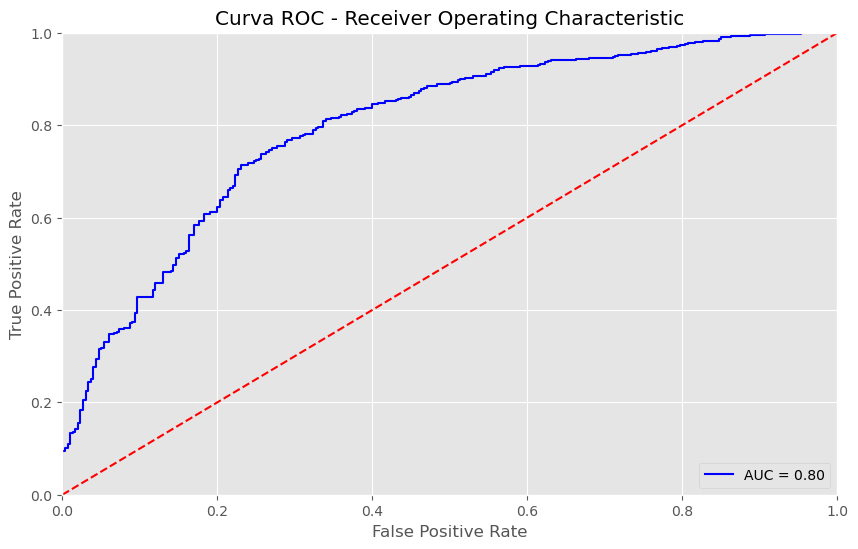

In [102]:
from sklearn import metrics

modelo = LogisticRegression()
modelo.fit(X,y)
# calculate the fpr and tpr for all thresholds of the classification
probs = modelo.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.title('Curva ROC - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logarithmic Loss

<br>
A perda de log é indicativa de quão próxima a probabilidade de previsão está do valor real/verdadeiro correspondente (0 ou 1 no caso de classificação binária), penalizando previsões imprecisas com valores mais altos. Menor perda de log indica melhor desempenho do modelo<br><br>

Avalia as previsões de probabilidade de um membro pertencer a uma determinada classe.<br />
Valores menores indicam boa performance, com 0 representando um perfeito logloss.<br /> 
A função cross_val_score() inverte o valor.

![image](images/logloss.png)

Onde: <br> 
$ y_i = valor \space observado $ <br>
$ p_i = probabilidade \space prevista $

![image](images/logloss02.png)

![image](images/logloss03.png)

Log Loss é a métrica de classificação mais importante baseada em probabilidades. <br>
Para qualquer problema, um valor de perda de log mais baixo significa melhores previsões.

In [118]:
# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds) 

#y_pred = y_pred.astype(np.float64)

resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'neg_log_loss')

resultado = resultado[~np.isnan(resultado)]

# Print do resultado
print("Logloss: %.3f (%.3f)" % (resultado.mean(), resultado.std()))
print(resultado)

Logloss: -0.426 (0.153)
[-0.3526 -0.3023 -0.3165 -0.3362 -0.3378 -0.431  -0.5651 -0.7703]


## Relatório de Classificação

Matriz de Confusão


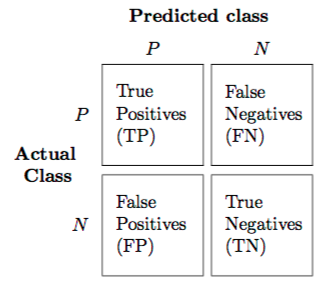

In [119]:
print("Matriz de Confusão")
Image("confusion_matrix.png")

Precision: Qual a proporção de instâncias classificadas como positivas, foram classificadas como corretas? <br />
$\text{Precision} = \frac{TP}{TP+FP}$
<br /><br />
Recall: Qual a proporção de instâncias positivas, foram identificadas como corretas?<br />
$\text{Recall} = \frac{TP}{TP+FN}$
<br /><br />
f1-score: f1-score combina as métricas de precision e recall<br /><br />
$\text{f1-score} = \frac{2 * (precision * recall)}{(precision + recall)}$
<br /><br />
O f1-score pode ser interpretado com a média ponderada entre precision e recall,<br />
onde o f1-score encontra seu melhor valor ao atingir 1, e seu pior valor ao atingir 0<br /><br />
Support: Número de instâncias

## Relatório de Classificação

In [120]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)
print(report)
# Imprimindo o relatório
#Image("confusion_matrix.png", width=250, height=250)

              precision    recall  f1-score   support

           0       0.75      0.43      0.55       105
           1       0.78      0.93      0.85       225

    accuracy                           0.77       330
   macro avg       0.76      0.68      0.70       330
weighted avg       0.77      0.77      0.75       330



In [121]:
print(report);print('matriz de confusão:\n', matrix) 

              precision    recall  f1-score   support

           0       0.75      0.43      0.55       105
           1       0.78      0.93      0.85       225

    accuracy                           0.77       330
   macro avg       0.76      0.68      0.70       330
weighted avg       0.77      0.77      0.75       330

matriz de confusão:
 [[ 45  60]
 [ 15 210]]


## Cálculo do Recall

<br>$ \text{Recall} = \frac{TP}{TP+FN}$

In [125]:
r0 = 45 / (45+60)
r0

0.42857142857142855

In [126]:
r1 = 210 / (210 + 15)
r1

0.9333333333333333

Recall: Qual a proporção de instâncias positivas, foram identificadas como corretas?

## Cálculo do Precision

$ \text{Precision} = \frac{TP}{TP+FP} $ 

In [127]:
p0 = 45 / (45 + 15)
p0

0.75

In [128]:
p1 = 210 / (210 + 60)
p1

0.7777777777777778

Precision: Qual a proporção de instâncias classificadas como positivas, foram classificadas como corretas?

----

# Selecao de Atributos

In [129]:
df.head()

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,apartamento.tipo,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [130]:
y = df['classificação_crédito'].values
X = df.drop('classificação_crédito', axis=1).to_numpy()

In [131]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier


num_atributos_relevantes = 17
estimator = modelo = GradientBoostingClassifier()
selector = RFE(estimator, n_features_to_select=num_atributos_relevantes, step=1)
selector = selector.fit(X, y)

print("Num Features: ", selector.n_features_)

atributos = list(df.columns) 
atributos.remove('classificação_crédito')

print(atributos)
print("Selected Features: ", selector.support_)
print("Feature Ranking: ", selector.ranking_)

Num Features:  17
['conta.saldo', 'crédito.duração.meses', 'pagamento.crédito.anterior.status', 'crédito.propósito', 'crédito.valor', 'poupança', 'duração.emprego', 'taxa.parcelamento', 'estado_civil', 'fiador', 'residência.duração', 'ativos.atual', 'idade', 'outros.créditos', 'apartamento.tipo', 'banco.crédito', 'ocupação', 'dependentes', 'telefone', 'trabalhador_estrangeiro']
Selected Features:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True False False]
Feature Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 3 4]


In [133]:
dfranking = pd.DataFrame({ 'atributos': atributos, 
                         'ranking' : selector.ranking_, 
                          }) 

dfranking = dfranking.sort_values(by='ranking')
dfranking

,atributos,ranking
0,conta.saldo,1
17,dependentes,1
16,ocupação,1
14,apartamento.tipo,1
13,outros.créditos,1
12,idade,1
11,ativos.atual,1
10,residência.duração,1
9,fiador,1
7,taxa.parcelamento,1


In [134]:
df['conta.saldo'].unique()

array([1, 2, 3])

In [135]:
atributos_selecionados = dfranking[ (dfranking.ranking == 1) ].atributos
atributos_selecionados = list(atributos_selecionados)
atributos_selecionados

['conta.saldo',
 'dependentes',
 'ocupação',
 'apartamento.tipo',
 'outros.créditos',
 'idade',
 'ativos.atual',
 'residência.duração',
 'fiador',
 'taxa.parcelamento',
 'duração.emprego',
 'poupança',
 'crédito.valor',
 'crédito.propósito',
 'pagamento.crédito.anterior.status',
 'crédito.duração.meses',
 'estado_civil']

In [136]:
df[atributos_selecionados].head()

,conta.saldo,dependentes,ocupação,apartamento.tipo,outros.créditos,idade,ativos.atual,residência.duração,fiador,taxa.parcelamento,duração.emprego,poupança,crédito.valor,crédito.propósito,pagamento.crédito.anterior.status,crédito.duração.meses,estado_civil
0,1,1,3,1,2,21,2,4,1,4,1,1,1049,2,3,18,1
1,1,2,3,1,2,36,1,2,1,2,2,1,2799,4,3,9,3
2,2,1,2,1,2,23,1,4,1,2,3,2,841,4,2,12,1
3,1,2,2,1,2,39,1,2,1,3,2,1,2122,4,3,12,3
4,1,1,2,2,1,38,2,4,1,4,2,1,2171,4,3,12,3


In [137]:
y = df['classificação_crédito'].values
X = df[atributos_selecionados].to_numpy()

In [138]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Acurácia: 0.709 (0.196)


In [139]:
from sklearn.metrics import confusion_matrix
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)


#matrix = confusion_matrix(Y_teste, model.predict(X_teste))

# Imprimindo a Confusion Matrix
print(matrix)

[[ 42  63]
 [ 17 208]]


In [ ]:
# Matriz de confusao com os todos os atributos20
# [[ 46  59]
#  [ 15 210]]

In [140]:
df1 = dfranking[ dfranking.ranking == 1 ]
df1

,atributos,ranking
0,conta.saldo,1
17,dependentes,1
16,ocupação,1
14,apartamento.tipo,1
13,outros.créditos,1
12,idade,1
11,ativos.atual,1
10,residência.duração,1
9,fiador,1
7,taxa.parcelamento,1


In [141]:
atributos_ranking = list(df1.atributos.values)
atributos_ranking

['conta.saldo',
 'dependentes',
 'ocupação',
 'apartamento.tipo',
 'outros.créditos',
 'idade',
 'ativos.atual',
 'residência.duração',
 'fiador',
 'taxa.parcelamento',
 'duração.emprego',
 'poupança',
 'crédito.valor',
 'crédito.propósito',
 'pagamento.crédito.anterior.status',
 'crédito.duração.meses',
 'estado_civil']

In [142]:
df.head()

,classificação_crédito,conta.saldo,crédito.duração.meses,pagamento.crédito.anterior.status,crédito.propósito,crédito.valor,poupança,duração.emprego,taxa.parcelamento,estado_civil,fiador,residência.duração,ativos.atual,idade,outros.créditos,apartamento.tipo,banco.crédito,ocupação,dependentes,telefone,trabalhador_estrangeiro
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2
